In [1]:
from keras import optimizers
from keras.layers import Activation, Conv2D, Dense, Flatten

# from keras.utils import np_utils
from keras.models import Sequential
from sklearn.metrics import confusion_matrix

# customized utilities
# from utils import util_processor as pro
from utils import util_process as pro

# import numpy as np


def get_model(params):
    model = Sequential()

    # Conv1
    model.add(
        Conv2D(16, (2, 2), input_shape=(10, 10, 4), padding="same", strides=(1, 1))
    )
    model.add(Activation("sigmoid"))

    # Conv2
    model.add(Conv2D(16, (2, 2), padding="same", strides=(1, 1)))
    model.add(Activation("sigmoid"))

    # FC
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))

    model.add(Dense(params["classes"]))
    model.add(Activation("softmax"))
    model.summary()

    return model


def train_model(params, data):
    model = get_model(params)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=params["optimizer"],
        metrics=["accuracy"],
    )
    hist = model.fit(
        x=data["train_gaf"],
        y=data["train_label_arr"],
        validation_data=(data["val_gaf"], data["val_label_arr"]),
        batch_size=params["batch_size"],
        epochs=params["epochs"],
        verbose=2,
    )

    return (model, hist)


def print_result(data, model):
    # get train & test pred-labels
    train_pred = model.predict(data["train_gaf"])
    test_pred = model.predict(data["test_gaf"])
    # get train & test true-labels
    train_label = data["train_label"][:, 0]
    test_label = data["test_label"][:, 0]
    # train & test confusion matrix
    train_result_cm = confusion_matrix(train_label, train_pred, labels=range(9))
    test_result_cm = confusion_matrix(test_label, test_pred, labels=range(9))

    print(train_result_cm, "\n", test_result_cm)


PARAMS = {}
PARAMS["pkl_name"] = "./data/label8_eurusd_10bar_1500_500_val200_gaf_culr.pkl"
PARAMS["model_name"] = "./model/cnn_model_01.keras"
PARAMS["classes"] = 9
PARAMS["learning_rate"] = 0.01
PARAMS["epochs"] = 50
PARAMS["batch_size"] = 64
PARAMS["optimizer"] = optimizers.SGD(learning_rate=PARAMS["learning_rate"])

# ---------------------------------------------------------
data = pro.load_pkl(PARAMS["pkl_name"])

print(data)  # Print the

# train cnn model
model, hist = train_model(PARAMS, data)
model.save(PARAMS["model_name"])



{'test_gaf': array([[[[-1.00000000e+00, -3.29410477e-01, -1.00000000e+00,
           2.60328620e-01],
         [-9.90127896e-01, -6.75391859e-01, -1.00000000e+00,
           1.29990009e-01],
         [-9.75494496e-01, -8.15294572e-01, -9.62007576e-01,
           1.17941699e-02],
         ...,
         [-1.99114846e-01,  5.79046424e-01, -1.00000000e+00,
           3.08931951e-01],
         [ 6.12323400e-17, -7.83647366e-01,  6.12323400e-17,
          -6.06137595e-02],
         [-7.84582972e-01, -8.15294572e-01, -9.95850199e-01,
          -6.08141176e-01]],

        [[-9.90127896e-01, -6.75391859e-01, -1.00000000e+00,
           1.29990009e-01],
         [-9.60706500e-01, -9.11662933e-01, -1.00000000e+00,
          -2.64473247e-03],
         [-9.35024260e-01, -9.77666337e-01, -9.62007576e-01,
          -1.20912619e-01],
         ...,
         [-5.97889763e-02,  2.10163112e-01, -1.00000000e+00,
           1.80078453e-01],
         [ 1.40166865e-01, -9.65232790e-01,  6.12323400e-17,
      

/Users/zeddpai/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 10, 10, 16)     │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 9)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,401 (810.16 KB)

 Trainable params: 207,401 (810.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 - 1s - 4ms/step - accuracy: 0.1987 - loss: 2.1763 - val_accuracy: 0.2000 - val_loss: 2.1774
Epoch 2/50
235/235 - 1s - 3ms/step - accuracy: 0.2002 - loss: 2.1628 - val_accuracy: 0.2000 - val_loss: 2.1526
Epoch 3/50
235/235 - 1s - 3ms/step - accuracy: 0.2000 - loss: 2.1489 - val_accuracy: 0.1320 - val_loss: 2.1737
Epoch 4/50
235/235 - 1s - 3ms/step - accuracy: 0.1997 - loss: 2.1262 - val_accuracy: 0.2015 - val_loss: 2.1272
Epoch 5/50
235/235 - 1s - 3ms/step - accuracy: 0.2020 - loss: 2.0794 - val_accuracy: 0.2000 - val_loss: 2.0276
Epoch 6/50
235/235 - 1s - 3ms/step - accuracy: 0.2292 - loss: 1.9625 - val_accuracy: 0.2305 - val_loss: 1.8517
Epoch 7/50
235/235 - 1s - 3ms/step - accuracy: 0.3343 - loss: 1.7499 - val_accuracy: 0.3135 - val_loss: 1.6127
Epoch 8/50
235/235 - 1s - 3ms/step - accuracy: 0.4245 - loss: 1.5669 - val_accuracy: 0.5025 - val_loss: 1.4367
Epoch 9/50
235/235 - 1s - 3ms/step - accuracy: 0.5007 - loss: 1.4228 - val_accuracy: 0.5565 - val_loss: 1.2816
E

In [36]:
# data["train_gaf"]
data["train_label"]
# test_pred = model.predict(data["test_gaf"])
# # get train & test true-labels
# train_label = data["train_label"][:, 0]
# test_label = data["test_label"][:, 0]

array([[1.000e+00, 1.224e+03, 5.000e+00],
       [1.000e+00, 1.232e+03, 5.000e+00],
       [1.000e+00, 1.541e+03, 7.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00]], dtype=float32)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
train_pred


array([[2.48344585e-01, 7.47451663e-01, 9.11081766e-10, ...,
        1.91149244e-03, 4.58394534e-05, 3.59042502e-07],
       [8.52455944e-03, 9.64159906e-01, 3.03187524e-15, ...,
        1.09719451e-07, 4.46177473e-05, 5.19469450e-14],
       [7.76714012e-02, 9.05739009e-01, 8.28711266e-10, ...,
        2.65154638e-04, 2.46540760e-03, 2.78910033e-08],
       ...,
       [8.10843527e-01, 3.48707508e-05, 4.03102860e-02, ...,
        2.72414107e-02, 5.14961039e-06, 9.38493311e-02],
       [8.98594737e-01, 4.18958236e-11, 8.20851978e-03, ...,
        2.61832822e-09, 1.14903678e-05, 2.38558862e-09],
       [1.08163044e-01, 1.13859457e-10, 2.22140402e-02, ...,
        1.85756385e-03, 9.10159240e-11, 3.95826638e-01]], dtype=float32)

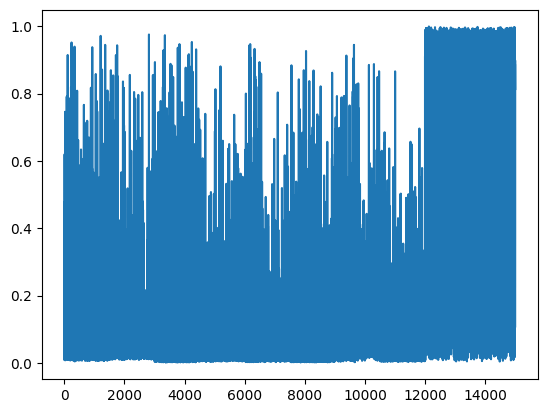

In [33]:

import pandas as pd

train_pred = model.predict(data["train_gaf"])
test_pred = model.predict(data["test_gaf"])


# get train & test true-labels
train_label = data["train_label"][:, 0].astype(int)

test_label = data["test_label"][:, 0].astype(int)
# train_label_class
print("train_pred")


ey = pd.Series(train_pred.swapaxes(0, 1)[0])
ey.plot()

train_pred

# train & test confusion matrix
# train_result_cm = confusion_matrix(train_label, train_pred, labels=range(9))
# test_result_cm = confusion_matrix(test_label, test_pred, labels=range(9))

# print(train_result_cm, "\n", test_result_cm)

In [ ]:

test_label = data["test_label"][:, 0].astype(int)
# train_label_class
print("train_pred")


ey = pd.Series(train_pred.swapaxes(0, 1)[0])
ey.plot()

train_pred

# train & test confusion matrix
# train_result_cm = confusion_matrix(train_label, train_pred, labels=range(9))
# test_result_cm = confusion_matrix(test_label, test_pred, labels=range(9))

# print(train_result_cm, "\n", test_result_cm)